## STAR WARS SURVEY DATA CLEANING AND ANALYSIS

Data gathered which can be found here [Link](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) by [FiveThirtyEight](https://fivethirtyeight.com/) through a survey targeting star wars fans was distributed to realize what Star Wars movies is considered the best by fans.

The goal of this project is to highlight the steps and flow of pre-processing data prior to exploration, and using data analysis techniques to uncover insights.

### Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

There are a total of 1187 rows and 38 columns in this dataframe

In [2]:
star_wars.shape

(1187, 38)

### Exploring the Data

*** - LIST OF COLUMNS ***

The code below lists out the name of the columns contained in the dataframe. As can be seen there are many columns in the dataframe, given that the data was gathered through a survey, some response included checking one or more boxes which is quite difficult to display in a column format. Subsequently, the data needs a lot of cleaning.

In [3]:
for col in star_wars:
    print(col)

RespondentID
Have you seen any of the 6 films in the Star Wars franchise?
Do you consider yourself to be a fan of the Star Wars film franchise?
Which of the following Star Wars films have you seen? Please select all that apply.
Unnamed: 4
Unnamed: 5
Unnamed: 6
Unnamed: 7
Unnamed: 8
Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
Unnamed: 10
Unnamed: 11
Unnamed: 12
Unnamed: 13
Unnamed: 14
Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.
Unnamed: 16
Unnamed: 17
Unnamed: 18
Unnamed: 19
Unnamed: 20
Unnamed: 21
Unnamed: 22
Unnamed: 23
Unnamed: 24
Unnamed: 25
Unnamed: 26
Unnamed: 27
Unnamed: 28
Which character shot first?
Are you familiar with the Expanded Universe?
Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦
Do you consider yourself to be a fan of the Star Trek franchise?
Gender
Age
Household Income
Education
Locat

*** - TOP 10 ROWS ***

In [4]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

#### Checking for empty values

In [5]:
star_wars.isnull().sum()

RespondentID                                                                                                                                       1
Have you seen any of the 6 films in the Star Wars franchise?                                                                                       0
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            350
Which of the following Star Wars films have you seen? Please select all that apply.                                                              513
Unnamed: 4                                                                                                                                       615
Unnamed: 5                                                                                                                                       636
Unnamed: 6                                                                                                

***Comment***

There are many columns with null values as much as 973, these columns most likely are from questions that were deemed optional to answer. Every data frame has a column that serves as the unique identifier for each row, which in this case is the "Respondent ID",

As the Respondent ID should be a unique column, any row which has a null respondent ID will be removed. As seen above, there is only one response with missing respondent ID.

In [6]:
star_wars = star_wars.dropna(subset=["RespondentID"])
star_wars["RespondentID"].isnull().sum()

0

### Mapping Yes and No Answers to Boolean Data Type

Certain columns such as the second and third columns which features the questions "Have you see any of the 6 films in the Star Wars franchose?" and "Do you conisider yourself to be a fan of the Star Wrs film franchise?" respectively, have reponses that are stored as "Yes and No" in the string data type.

To power our analysis, these columns should instead be True, False and NaN for rows with answers as Yes and No,
transforming them from a string data type to a boolean data type.

In [7]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [9]:
boolean_response = {
    "Yes": True,
    "No": False
}

cols = ["Have you seen any of the 6 films in the Star Wars franchise?","Do you consider yourself to be a fan of the Star Wars film franchise?"]
for col in cols:
    star_wars[col] = star_wars[col].map(boolean_response)

In [10]:
for col in cols:
    print(star_wars[col].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


** COMMENT **

Both columns now onlu contain True, False and NaN values.

### Cleaning and Mapping Checkbox Columns

The columns four to nine represent a single checkbox question, where the respondent checked off a boxes in response to the question placed in column six, "Which of the following Star Wars films have you seen? Please select all that apply". 

The subsequent columns following and including column four are the name of the films presented as a chcekbox;

Column 4 - Whether or not the responsent saw the film "Star Wars: Episode I The Phantom Menace"

Column 5 - Whether or not the responsent saw the film "Star Wars: Episode II Attack of the Clones"

Column 6 - Whether or not the responsent saw the film "Star Wars: Episode III Revenge of the Sith"

Column 7 - Whether or not the responsent saw the film "Star Wars: Episode IV A New Hope"

Column 8 - Whether or not the responsent saw the film "Star Wars: Episode V The Empire Strikes Back"

Column 9 -  Whether or not the responsent saw the film "Star Wars: Episode VI Return of the Jedi".


For each of the columns, if the value is the name of the movie, it means they watched the movie, and if the value is NaN, it means they either did not watch it or did not answer. 

The map method will also be applied on these columns to change the values to a more intuitive data type, i.e. the boolean data type, where if the value of the column is the name of the movie, it will be mapped as true, and if it is NaN it will be mapped as false.

In [11]:
movies_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
     np.nan: False
}

columns = star_wars.columns[3:9]
for col in columns:
    star_wars[col] = star_wars[col].map(movies_mapping)

In [12]:
for col in columns:
    print(star_wars[col].value_counts())

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64
False    636
True     550
Name: Unnamed: 5, dtype: int64
True     607
False    579
Name: Unnamed: 6, dtype: int64
True     758
False    428
Name: Unnamed: 7, dtype: int64
True     738
False    448
Name: Unnamed: 8, dtype: int64


** COMMENT **

The values of the columns have been changed to true and false, the next step will be to change the column names as they are quite undefined here. 

Each of the six columns will be named as seen_movie1 incremenntally.

In [13]:
star_wars = star_wars.rename(columns = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_movie1",
    "Unnamed: 4": "seen_movie2",
    "Unnamed: 5": "seen_movie3",
    "Unnamed: 6": "seen_movie4",
    "Unnamed: 7": "seen_movie5",
    "Unnamed: 8": "seen_movie6",
})


In [14]:
star_wars.columns[3:9]

Index(['seen_movie1', 'seen_movie2', 'seen_movie3', 'seen_movie4',
       'seen_movie5', 'seen_movie6'],
      dtype='object')

### Cleaning the Ranking Columns

The following six columns requested the respondents to rank the Star wars movies from least favourite to most favourite, with 1 being the most favourite and 6 being the least.

Let's explore the columns to understand how it needs to be cleaned.

In [15]:
ranking_columns = star_wars.columns[9:15]
ranking_columns

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [16]:
for col in ranking_columns:
    print(star_wars[col].dtypes)

object
object
object
object
object
object


In [17]:
for col in ranking_columns:
    print("")
    print("Unique Values")
    print(star_wars[col].value_counts())


Unique Values
4    237
6    168
3    130
1    129
5    100
2     71
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64

Unique Values
5    300
4    183
2    116
3    103
6    102
1     32
Name: Unnamed: 10, dtype: int64

Unique Values
6    217
5    203
4    182
3    150
2     47
1     36
Name: Unnamed: 11, dtype: int64

Unique Values
1    204
6    161
2    135
4    130
3    127
5     79
Name: Unnamed: 12, dtype: int64

Unique Values
1    289
2    235
5    118
3    106
4     47
6     41
Name: Unnamed: 13, dtype: int64

Unique Values
2    232
3    220
1    146
6    145
4     57
5     36
Name: Unnamed: 14, dtype: int64


** COMMENT **

Based on the code above;
The columns values are all a number from 1 to 6, which indicates the rank given to the movie. However, the values are stored as an object datatype, thus they need to be changed to a numerical data type.

Additionally, the column names need to changed as well, to indicate what movie is being ranked for each column.

#### Change Columns data types to float

In [18]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [19]:
for col in ranking_columns:
    print(star_wars[col].dtypes)

float64
float64
float64
float64
float64
float64


#### Change columns names

In [20]:
star_wars = star_wars.rename(columns = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"movie1_ranking",
    "Unnamed: 10": "movie2_ranking",
    "Unnamed: 11": "movie3_ranking",
    "Unnamed: 12": "movie4_ranking",
    "Unnamed: 13": "movie5_ranking",
    "Unnamed: 14": "movie6_ranking",
})

In [21]:
star_wars.columns[9:15]

Index(['movie1_ranking', 'movie2_ranking', 'movie3_ranking', 'movie4_ranking',
       'movie5_ranking', 'movie6_ranking'],
      dtype='object')

### Cleaning Character Columns

The subsequent columns, column 15 to 18 examines how the respondents view each character from the star wars franchise, for which each of the columns represent one character, and the respondents were given a radio button to check from one of the three options;

1. Favourably

2. Unfavourably

3. Unfamiliar

These columns will be cleaned up similar to the ranking columns, where the values are explored to see if they are the right data types and the column names are changed.

The list of the characters are:

1. Luke Skywalker

2. Hans Solo

3. Princess Leia Organa

4. Obi Wan Kenobi

5. Yoda

6. R2-D2

7. C-3P0

8. Anakin Skywalker

9. Darth Vader

10. Lando Calrissan

11. Padme Amidala

12. Boba Fett

13. Emperor Palpatine

14. Jar Jar Binks

** The following are the choices respondents needed to choose from **

In [22]:
star_wars["Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her."].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64

In [23]:
character_columns = star_wars.columns[15:29]
character_oldcolumnnames = []
for col in character_columns:
    character_oldcolumnnames.append(col)

print(character_oldcolumnnames)

['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28']


In [24]:
character_newcolumnnames = ["Luke Skywalker", "Hans Solo","Princess Leia Organa", "Obi Wan Kenobi", "Yoda", "R2-D2", "C-3P0", "Anakin Skywalker", "Darth Vader", "Lando Calrissan", "Padme Amidala", "Boba Fett", "Emperor Palpatine", "Jar Jar Binks"]

In [25]:
map_columns = {}

for value in range(0, len(character_oldcolumnnames)):
    key = character_oldcolumnnames[value]
    value = character_newcolumnnames[value]
    map_columns[key] = value

print(map_columns)

{'Unnamed: 16': 'Hans Solo', 'Unnamed: 19': 'Yoda', 'Unnamed: 24': 'Lando Calrissan', 'Unnamed: 27': 'Emperor Palpatine', 'Unnamed: 18': 'Obi Wan Kenobi', 'Unnamed: 26': 'Boba Fett', 'Unnamed: 22': 'Anakin Skywalker', 'Unnamed: 20': 'R2-D2', 'Unnamed: 21': 'C-3P0', 'Unnamed: 17': 'Princess Leia Organa', 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Luke Skywalker', 'Unnamed: 23': 'Darth Vader', 'Unnamed: 28': 'Jar Jar Binks', 'Unnamed: 25': 'Padme Amidala'}


In [26]:
star_wars = star_wars.rename(columns = map_columns)

In [27]:
star_wars.columns[15:29]

Index(['Luke Skywalker', 'Hans Solo', 'Princess Leia Organa', 'Obi Wan Kenobi',
       'Yoda', 'R2-D2', 'C-3P0', 'Anakin Skywalker', 'Darth Vader',
       'Lando Calrissan', 'Padme Amidala', 'Boba Fett', 'Emperor Palpatine',
       'Jar Jar Binks'],
      dtype='object')

In [28]:
star_wars["Yoda"].value_counts()

Very favorably                                 591
Somewhat favorably                             159
Neither favorably nor unfavorably (neutral)     43
Unfamiliar (N/A)                                17
Somewhat unfavorably                             8
Very unfavorably                                 7
Name: Yoda, dtype: int64

** COMMENT **

The character columns have been cleaned out in the precceding codes. The dataframe is now ready for analysis.

### Analysis

### 1.  Find the Highest Ranked Movie

In [29]:
movie_names = ["The Phantom Menace", "Attack of the Clones", "Revenge of the Sith", "A New Hope", "The Empire Strikes Back", "Return of the Jedi"]
ranking_columns = star_wars.columns[9:15]
ranking_means = []

for col in ranking_columns:
    ranking_means.append(star_wars[col].mean())

print(ranking_means)    

[3.7329341317365268, 4.087320574162679, 4.341317365269461, 3.272727272727273, 2.513157894736842, 3.047846889952153]


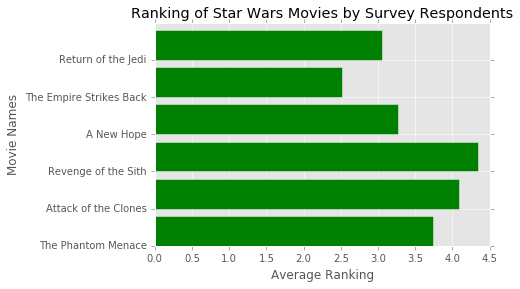

In [30]:
%matplotlib inline
plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(movie_names)]
plt.barh(x_pos, ranking_means, color='green')
plt.ylabel("Movie Names")
plt.xlabel("Average Ranking")
plt.title("Ranking of Star Wars Movies by Survey Respondents")
plt.yticks(x_pos, movie_names)
plt.show()

** COMMENT **

Considering the Ranking was from a scale of 1 to 6, with 1 being the favourite and 6 being the list favourite. Thus, a lower ranking means the movie was liked better. We can see that the movie with the highest ranking is "The Empire Strikes Back", and the movie with the lowest ranking is "Revenge of the Sith".

Rankings:
1. The Empire Strikes Back

2. Return of the Jedi

3. A new hope

4. The Phantom Menace

5. Attack of the clones

6. Revenge of the sith

### 2. Finding The Most Viewed Movie 

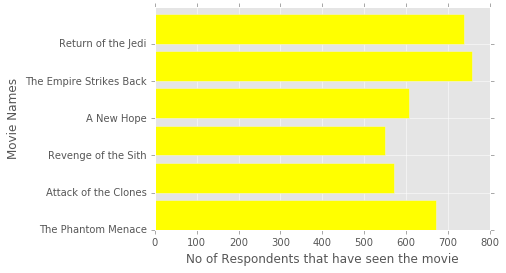

In [31]:
%matplotlib inline
plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(movie_names)]
seen_movies = star_wars[star_wars.columns[3:9]].sum()
plt.barh(x_pos, seen_movies, color="yellow")
plt.yticks(x_pos, movie_names)
plt.xlabel("No of Respondents that have seen the movie")
plt.ylabel("Movie Names")
plt.show()


** COMMENT **

The bar graph above indicates the "Empire Strikes Back" to be the movie with the highest number of viewers from the survey respondents. Whereas, Revenge of the sith has the lowest number of viewers. Which correlates with the ranking displayed previously where The Empire Strikes back being the highest ranked also is most viewed and The Revenge of the Sith having the lowest ranking being the least viewed. This could mean that people who watched Revenge of the sith did not enjoy it and thus influenced others to not watch it, or it just did not gather enough viewers thus giving it a disadvantage in terms of ranking in comparison to the other movies.

The following is the order of most watched to least watched Star Wars Movies:

1. The Empire Strikes Back

2. Return of the Jedi

3. The Phantom Menace

4. A New Hope

5. Attack of the Clones

6. Revenge of the Sith

In [32]:
3

3

### Exploring the Data by Binary Segments

The goal of this section is to determine how each two different segment (specifically genders) responded to the survey, by computing the highest ranked and most viewed movies by Male and Females seperately.

In [33]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
print(males.shape)
print(females.shape)

(497, 38)
(549, 38)


There were 497 male repsondents and 549 female respondents

####  Male and Female View Counts

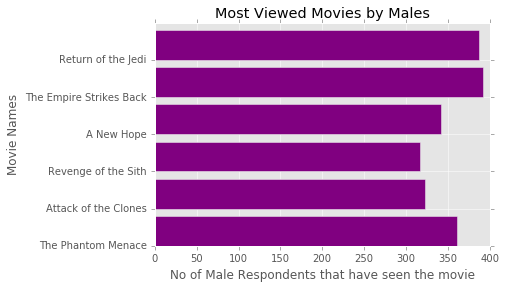

In [34]:
%matplotlib inline
plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(movie_names)]
seen_movies = males[males.columns[3:9]].sum()
plt.barh(x_pos, seen_movies, color="purple")
plt.yticks(x_pos, movie_names)
plt.xlabel("No of Male Respondents that have seen the movie")
plt.ylabel("Movie Names")
plt.title("Most Viewed Movies by Males")
plt.show()

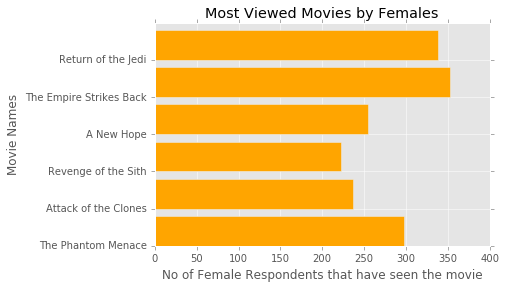

In [35]:
%matplotlib inline
plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(movie_names)]
seen_movies = females[females.columns[3:9]].sum()
plt.barh(x_pos, seen_movies, color="orange")
plt.yticks(x_pos, movie_names)
plt.xlabel("No of Female Respondents that have seen the movie")
plt.ylabel("Movie Names")
plt.title("Most Viewed Movies by Females")
plt.show()

####  Male and Female Rankings

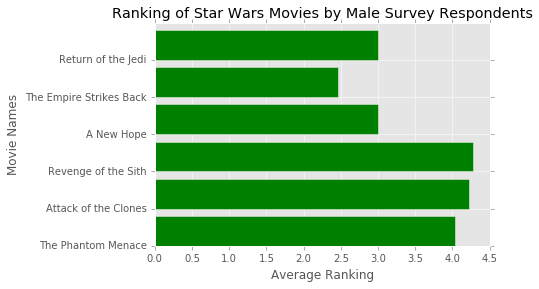

In [36]:
%matplotlib inline
plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(movie_names)]
plt.barh(x_pos, males[males.columns[9:15]].mean(), color='green')
plt.ylabel("Movie Names")
plt.xlabel("Average Ranking")
plt.title("Ranking of Star Wars Movies by Male Survey Respondents")
plt.yticks(x_pos, movie_names)
plt.show()

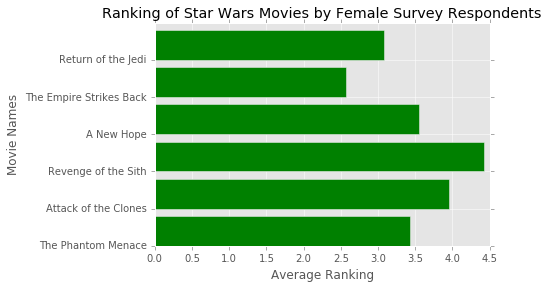

In [37]:
%matplotlib inline
plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(movie_names)]
plt.barh(x_pos, females[females.columns[9:15]].mean(), color='green')
plt.ylabel("Movie Names")
plt.xlabel("Average Ranking")
plt.title("Ranking of Star Wars Movies by Female Survey Respondents")
plt.yticks(x_pos, movie_names)
plt.show()

There is no huge stark difference between the rankings and views of males and females.

Overall males watched more of the movies in comparison to female respondents. Additionally, male respondents seem to like the earlier movies (i,e Revenge of the Sith, Attack of the clones, A new hope) more than the female respondents.